# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")

df = pd.read_csv(airbnbDataSet_filename)

df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


### Some initial exploration of the dataset

In [3]:
df.columns

Index(['name', 'description', 'neighborhood_overview', 'host_name',
       'host_location', 'host_about', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_group_cleansed', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',

In [4]:
df.shape

(28022, 50)

In [5]:
np.sum(df.isna(), axis=0)

name                                                5
description                                       570
neighborhood_overview                            9816
host_name                                           0
host_location                                      60
host_about                                      10945
host_response_rate                              11843
host_acceptance_rate                            11113
host_is_superhost                                   0
host_listings_count                                 0
host_total_listings_count                           0
host_has_profile_pic                                0
host_identity_verified                              0
neighbourhood_group_cleansed                        0
room_type                                           0
accommodates                                        0
bathrooms                                           0
bedrooms                                         2918
beds                        

## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. Airbnb NYC "listings" data set
2. The label will be price.
3. This is a supervised learning problem, specifically regression.
4. The features will be everything besides the label, host_about, host_response_rate, host_acceptance_rate, and columns related to reviews. I will not include the review related columns because I'm seeking to predict the price for the scenario where the listing is initially being created.
5. Predicting the price of a listing is crucial because it is a key factor in a customer's decision to choose a listing. By predicting the price, the company can recommend a baseline price for listing hosts, so they can settle on a price that is reasonable for their listing. Through price guidance, listings will be more likely to be rented, leading to more sales for the company.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [6]:
df.describe()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
count,16179.000000,16909.000000,28022.000000,28022.000000,28022.000000,28022.000000,25104.000000,26668.000000,28022.000000,28022.000000,...,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000
mean,0.906901,0.791953,14.554778,14.554778,2.874491,1.142174,1.329708,1.629556,154.228749,18.689387,...,4.814300,4.808041,4.750393,4.647670,9.581900,5.562986,3.902077,0.048283,1.758325,5.169510
std,0.227282,0.276732,120.721287,120.721287,1.860251,0.421132,0.700726,1.097104,140.816605,25.569151,...,0.438603,0.464585,0.415717,0.518023,32.227523,26.121426,17.972386,0.442459,4.446143,2.028497
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,29.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000,1.000000
25%,0.940000,0.680000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,70.000000,2.000000,...,4.810000,4.810000,4.670000,4.550000,1.000000,0.000000,0.000000,0.000000,0.130000,4.000000
50%,1.000000,0.910000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,115.000000,30.000000,...,4.960000,4.970000,4.880000,4.780000,1.000000,1.000000,0.000000,0.000000,0.510000,5.000000
75%,1.000000,1.000000,3.000000,3.000000,4.000000,1.000000,1.000000,2.000000,180.000000,30.000000,...,5.000000,5.000000,5.000000,5.000000,3.000000,1.000000,1.000000,0.000000,1.830000,7.000000
max,1.000000,1.000000,3387.000000,3387.000000,16.000000,8.000000,12.000000,21.000000,1000.000000,1250.000000,...,5.000000,5.000000,5.000000,5.000000,421.000000,308.000000,359.000000,8.000000,141.000000,13.000000


In [7]:
#identify the amount of missing values in each column
num_na = np.sum(df.isnull(), axis=0)
num_na

name                                                5
description                                       570
neighborhood_overview                            9816
host_name                                           0
host_location                                      60
host_about                                      10945
host_response_rate                              11843
host_acceptance_rate                            11113
host_is_superhost                                   0
host_listings_count                                 0
host_total_listings_count                           0
host_has_profile_pic                                0
host_identity_verified                              0
neighbourhood_group_cleansed                        0
room_type                                           0
accommodates                                        0
bathrooms                                           0
bedrooms                                         2918
beds                        

In [8]:
#check the data types in this dataset
df.dtypes

name                                             object
description                                      object
neighborhood_overview                            object
host_name                                        object
host_location                                    object
host_about                                       object
host_response_rate                              float64
host_acceptance_rate                            float64
host_is_superhost                                  bool
host_listings_count                             float64
host_total_listings_count                       float64
host_has_profile_pic                               bool
host_identity_verified                             bool
neighbourhood_group_cleansed                     object
room_type                                        object
accommodates                                      int64
bathrooms                                       float64
bedrooms                                        

In [9]:
#select the columns containing numerical values
numeric = df.select_dtypes(include=['number'])

In [10]:
#use z-scores to normalize the column values
df_zscores = df.select_dtypes(include=['number']).apply(stats.zscore)
df_zscores.head(5)

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,NaN,NaN,-0.054298,-0.054298,-1.007673,-0.337606,NaN,NaN,-0.030031,0.442362,...,-0.123804,-0.038834,0.263662,-0.458809,-0.204236,-0.098120,-0.217119,-0.109127,-0.321256,1.888373
1,NaN,NaN,-0.112284,-0.112284,0.067470,-0.337606,NaN,NaN,-0.562648,-0.691838,...,-0.078204,-0.017309,-0.097167,-0.014806,-0.266296,-0.174687,-0.217119,-0.109127,0.697623,0.409419
2,NaN,NaN,-0.112284,-0.112284,0.605041,0.849692,NaN,NaN,0.857665,-0.535396,...,0.423398,0.413191,-0.602328,0.680156,-0.266296,-0.174687,-0.217119,-0.109127,-0.390981,-1.069535
3,NaN,NaN,-0.112284,-0.112284,-0.470102,-0.337606,NaN,NaN,-0.612359,-0.652727,...,-0.351805,-0.835257,0.287717,-0.555332,-0.266296,-0.212970,-0.161477,-0.109127,0.432219,-0.576550
4,NaN,NaN,-0.112284,-0.112284,-1.007673,-0.337606,NaN,NaN,-0.562648,-0.652727,...,0.354998,0.305566,0.456104,0.525720,-0.266296,-0.212970,-0.161477,-0.109127,-0.199800,0.902404


In [11]:
#look at distribution
df_zscores.describe().loc[['mean', 'std', '50%', 'min', 'max']]

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
mean,NaN,NaN,1.128369e-17,1.128369e-17,-5.679879e-17,1.767355e-16,NaN,NaN,-8.519819e-17,4.057057e-17,...,-1.559938e-15,-3.732492e-16,1.570081e-15,6.937567e-16,4.057057e-18,-8.114113e-18,-3.042792e-18,1.318543e-17,-8.114113e-18,1.622823e-16
std,NaN,NaN,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,NaN,NaN,1.000018e+00,1.000018e+00,...,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00
50%,NaN,NaN,-1.122836e-01,-1.122836e-01,-4.701017e-01,-3.376059e-01,NaN,NaN,-2.785854e-01,4.423618e-01,...,3.321974e-01,3.486157e-01,3.117725e-01,2.554571e-01,-2.662958e-01,-1.746868e-01,-2.171190e-01,-1.091273e-01,-2.807708e-01,-8.356566e-02
min,NaN,NaN,-1.205673e-01,-1.205673e-01,-1.007673e+00,-2.712202e+00,NaN,NaN,-8.893197e-01,-6.918377e-01,...,-1.097664e+01,-1.034929e+01,-1.142720e+01,-8.972095e+00,-2.662958e-01,-2.129702e-01,-2.171190e-01,-1.091273e-01,-3.932298e-01,-2.055504e+00
max,NaN,NaN,2.793629e+01,2.793629e+01,7.055900e+00,1.628457e+01,NaN,NaN,6.006297e+00,4.815696e+01,...,4.233977e-01,4.131906e-01,6.004358e-01,6.801561e-01,1.276628e+01,1.157833e+01,1.975833e+01,1.797196e+01,3.131797e+01,3.860311e+00


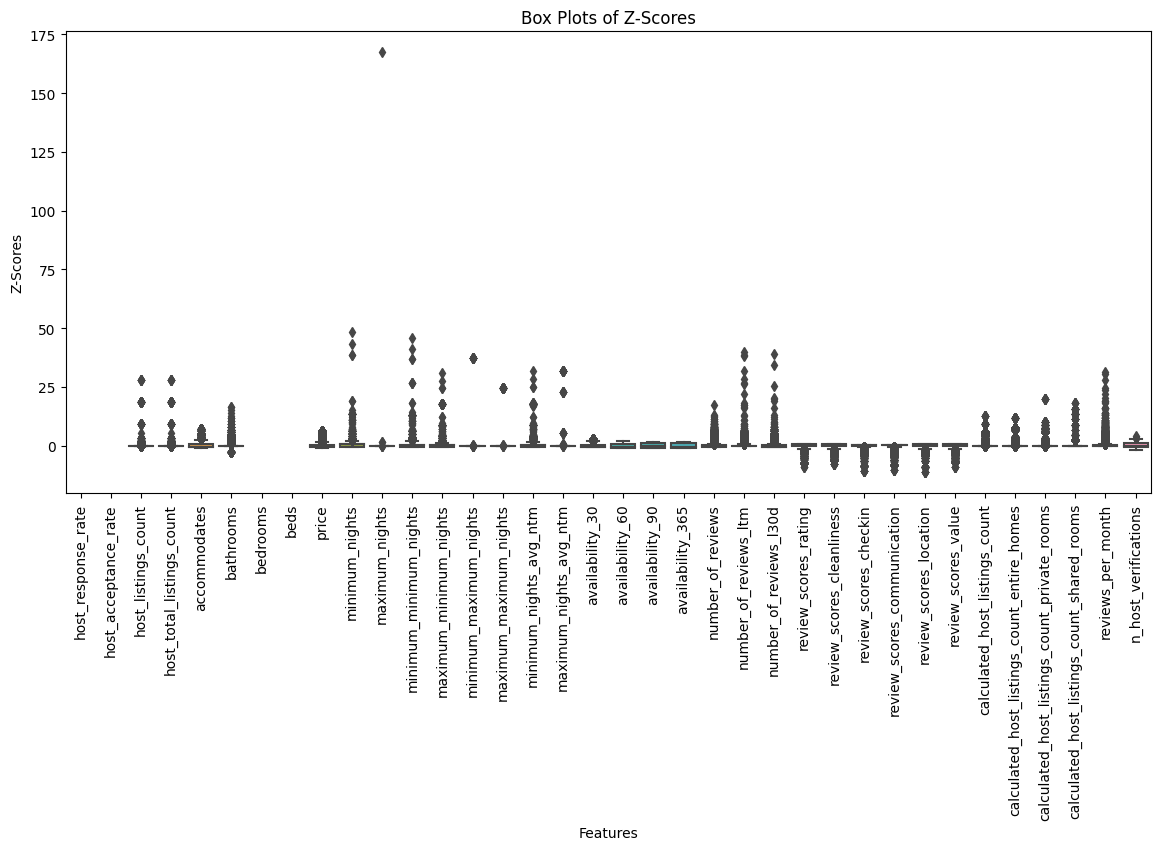

In [12]:
#create box plots for each column in df_zscores to visually see the distribution
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_zscores)
plt.title('Box Plots of Z-Scores')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.ylabel('Z-Scores')
plt.show()

In [13]:
#select the non-numeric columns
non_num = df.select_dtypes(exclude=['number'])

#print out the number of unique values in each column and the unique values
#use the output to evaluate which non-numeric columns are categories
for col in non_num:
    unique = df[col].unique()
    print(col, len(unique), unique, '\n\n')

name 27387 ['Skylit Midtown Castle'
 'Whole flr w/private bdrm, bath & kitchen(pls read)'
 'Spacious Brooklyn Duplex, Patio + Garden' ...
 'Perfect Room to Stay in Brooklyn! Near Metro!'
 'New Beautiful Modern One Bedroom in Brooklyn'
 'Large, modern, private 1 bedroom in beach condo'] 


description 25953 ['Beautiful, spacious skylit studio in the heart of Midtown, Manhattan. <br /><br />STUNNING SKYLIT STUDIO / 1 BED + SINGLE / FULL BATH / FULL KITCHEN / FIREPLACE / CENTRALLY LOCATED / WiFi + APPLE TV / SHEETS + TOWELS<br /><br /><b>The space</b><br />- Spacious (500+ft²), immaculate and nicely furnished & designed studio.<br />- Tuck yourself into the ultra comfortable bed under the skylight. Fall in love with a myriad of bright lights in the city night sky. <br />- Single-sized bed/convertible floor mattress with luxury bedding (available upon request).<br />- Gorgeous pyramid skylight with amazing diffused natural light, stunning architectural details, soaring high vaulted ceiling

In [14]:
#choose columns with at most 5 unique values to be categorical columns
categorical = [col for col in non_num.columns if len(df[col].unique()) <= 5]
categorical

['host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood_group_cleansed',
 'room_type',
 'has_availability',
 'instant_bookable']

In [15]:
#look at the distributions of the categorical variables
for c in categorical:
    print(df[c].value_counts(), '\n\n')

True    28022
Name: host_is_superhost, dtype: int64 


True    28022
Name: host_has_profile_pic, dtype: int64 


True    28022
Name: host_identity_verified, dtype: int64 


Manhattan        11639
Brooklyn         11258
Queens            4003
Bronx              838
Staten Island      284
Name: neighbourhood_group_cleansed, dtype: int64 


Entire home/apt    15604
Private room       11901
Shared room          380
Hotel room           137
Name: room_type, dtype: int64 


True     26979
False     1043
Name: has_availability, dtype: int64 


False    20382
True      7640
Name: instant_bookable, dtype: int64 




In [16]:
#check if the columns relating to minimum_nights are dependent with each other
min_nights = df.columns[df.columns.str.contains('minimum_nights')]
min_nights

Index(['minimum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_nights_avg_ntm'],
      dtype='object')

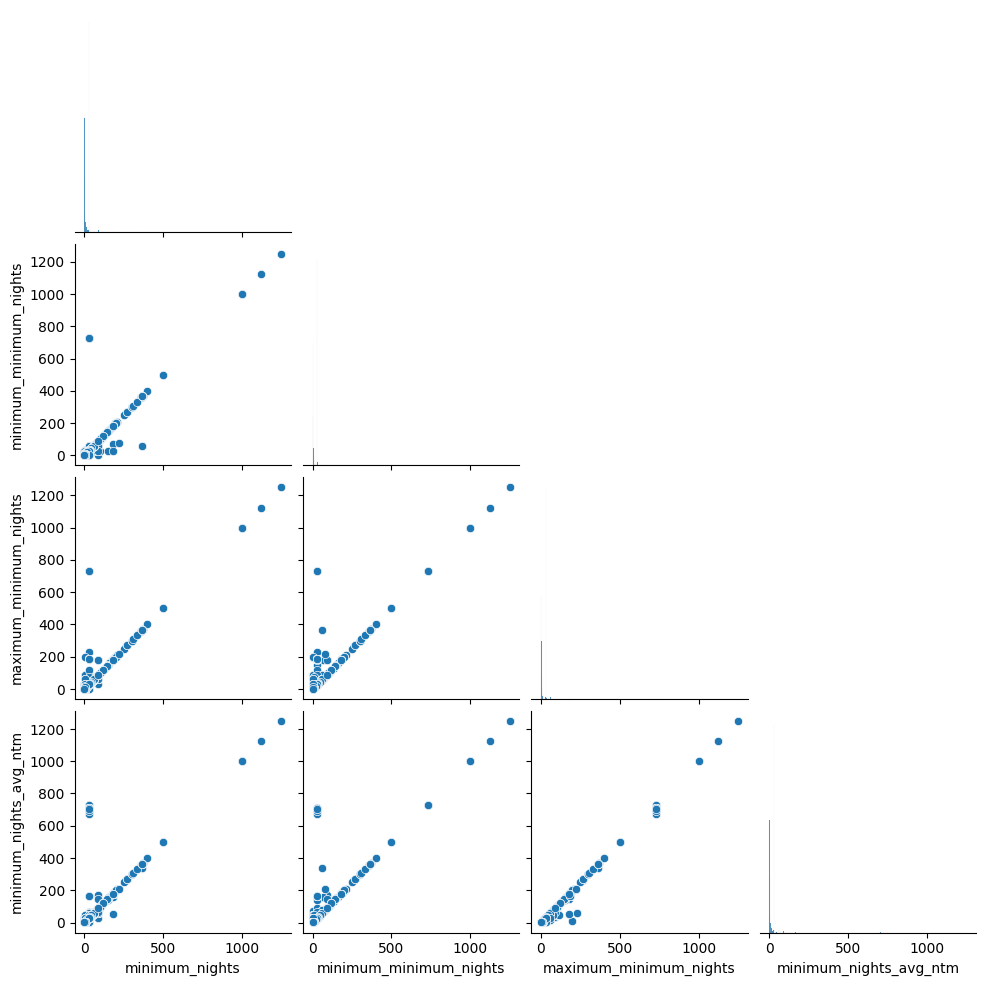

In [17]:
sns.pairplot(df[min_nights], corner=True)

Since the pairplots all show a mainly linear relationship between the pairs, these features are linearly dependent and only one should be kept.

In [18]:
#see if there are any other dependent features using the correlation matrix
corr = df.corr()
corr

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
host_response_rate,1.000000,0.505700,NaN,0.041423,0.041423,NaN,NaN,0.026465,0.023813,0.018564,...,0.119313,0.061722,0.090777,0.107960,0.076876,0.040648,0.079988,-0.016927,0.109877,0.023884
host_acceptance_rate,0.505700,1.000000,NaN,0.041191,0.041191,NaN,NaN,0.062157,-0.003367,0.022499,...,0.005372,0.004206,0.010247,0.356202,0.038842,0.060339,-0.024103,0.012490,0.189180,-0.070484
host_is_superhost,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_listings_count,0.041423,0.041191,NaN,1.000000,1.000000,NaN,NaN,-0.003904,0.013256,-0.004767,...,-0.050561,0.006252,-0.074282,0.085573,0.507185,0.508865,0.169661,-0.008245,-0.021916,0.091531
host_total_listings_count,0.041423,0.041191,NaN,1.000000,1.000000,NaN,NaN,-0.003904,0.013256,-0.004767,...,-0.050561,0.006252,-0.074282,0.085573,0.507185,0.508865,0.169661,-0.008245,-0.021916,0.091531
host_has_profile_pic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_identity_verified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,0.026465,0.062157,NaN,-0.003904,-0.003904,NaN,NaN,1.000000,0.369444,0.744437,...,-0.001089,-0.012964,-0.008672,-0.005734,-0.066611,-0.009926,-0.102831,-0.048569,0.067380,-0.016719
bathrooms,0.023813,-0.003367,NaN,0.013256,0.013256,NaN,NaN,0.369444,1.000000,0.477983,...,-0.017033,-0.017950,-0.006047,-0.030011,-0.022528,-0.031999,0.006835,0.017551,-0.008373,0.012352
bedrooms,0.018564,0.022499,NaN,-0.004767,-0.004767,NaN,NaN,0.744437,0.477983,1.000000,...,-0.000311,-0.010955,0.000389,-0.044521,-0.053666,-0.003168,-0.082429,-0.050494,0.031718,-0.023971


In [19]:
#clean correlation matrix by removing cols and rows where value is NA
corr_na = np.sum(corr.isnull(), axis=0)
corr_na

host_response_rate                               3
host_acceptance_rate                             3
host_is_superhost                               41
host_listings_count                              3
host_total_listings_count                        3
host_has_profile_pic                            41
host_identity_verified                          41
accommodates                                     3
bathrooms                                        3
bedrooms                                         3
beds                                             3
price                                            3
minimum_nights                                   3
maximum_nights                                   3
minimum_minimum_nights                           3
maximum_minimum_nights                           3
minimum_maximum_nights                           3
maximum_maximum_nights                           3
minimum_nights_avg_ntm                           3
maximum_nights_avg_ntm         

In [20]:
#select the features that are missing correlation values
corr_drop = corr_na[corr_na == 41].index
corr_drop

Index(['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified'], dtype='object')

In [21]:
#drop the rows and cols with missing values
corr = corr.drop(columns=corr_drop, index=corr_drop)
corr

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
host_response_rate,1.000000,0.505700,0.041423,0.041423,0.026465,0.023813,0.018564,0.024933,0.006480,-0.168258,...,0.119313,0.061722,0.090777,0.107960,0.076876,0.040648,0.079988,-0.016927,0.109877,0.023884
host_acceptance_rate,0.505700,1.000000,0.041191,0.041191,0.062157,-0.003367,0.022499,0.039634,0.037550,-0.194484,...,0.005372,0.004206,0.010247,0.356202,0.038842,0.060339,-0.024103,0.012490,0.189180,-0.070484
host_listings_count,0.041423,0.041191,1.000000,1.000000,-0.003904,0.013256,-0.004767,-0.015083,0.080995,0.023019,...,-0.050561,0.006252,-0.074282,0.085573,0.507185,0.508865,0.169661,-0.008245,-0.021916,0.091531
host_total_listings_count,0.041423,0.041191,1.000000,1.000000,-0.003904,0.013256,-0.004767,-0.015083,0.080995,0.023019,...,-0.050561,0.006252,-0.074282,0.085573,0.507185,0.508865,0.169661,-0.008245,-0.021916,0.091531
accommodates,0.026465,0.062157,-0.003904,-0.003904,1.000000,0.369444,0.744437,0.774654,0.519057,-0.061501,...,-0.001089,-0.012964,-0.008672,-0.005734,-0.066611,-0.009926,-0.102831,-0.048569,0.067380,-0.016719
bathrooms,0.023813,-0.003367,0.013256,0.013256,0.369444,1.000000,0.477983,0.384581,0.331297,-0.012735,...,-0.017033,-0.017950,-0.006047,-0.030011,-0.022528,-0.031999,0.006835,0.017551,-0.008373,0.012352
bedrooms,0.018564,0.022499,-0.004767,-0.004767,0.744437,0.477983,1.000000,0.757191,0.475506,-0.030590,...,-0.000311,-0.010955,0.000389,-0.044521,-0.053666,-0.003168,-0.082429,-0.050494,0.031718,-0.023971
beds,0.024933,0.039634,-0.015083,-0.015083,0.774654,0.384581,0.757191,1.000000,0.409236,-0.050932,...,-0.003335,-0.024145,-0.008820,-0.015089,-0.081906,-0.042835,-0.084342,0.034802,0.057484,-0.027045
price,0.006480,0.037550,0.080995,0.080995,0.519057,0.331297,0.475506,0.409236,1.000000,-0.079945,...,0.000590,0.096610,-0.004761,0.039190,0.020270,0.053687,-0.044941,-0.044391,0.030817,-0.024597
minimum_nights,-0.168258,-0.194484,0.023019,0.023019,-0.061501,-0.012735,-0.030590,-0.050932,-0.079945,1.000000,...,-0.017336,-0.007783,-0.038625,-0.097435,0.020426,0.019128,0.010109,-0.018926,-0.187978,0.061831


In [22]:
#check if any features are strong predictors for the label
corr['price'].drop('price').sort_values()

minimum_nights                                 -0.079945
minimum_minimum_nights                         -0.071261
calculated_host_listings_count_private_rooms   -0.044941
calculated_host_listings_count_shared_rooms    -0.044391
number_of_reviews                              -0.033492
n_host_verifications                           -0.024597
minimum_nights_avg_ntm                         -0.011273
maximum_minimum_nights                         -0.007691
review_scores_value                            -0.004761
review_scores_checkin                          -0.004051
maximum_nights                                 -0.001024
review_scores_communication                     0.000590
host_response_rate                              0.006480
calculated_host_listings_count                  0.020270
reviews_per_month                               0.030817
host_acceptance_rate                            0.037550
instant_bookable                                0.039190
review_scores_rating           

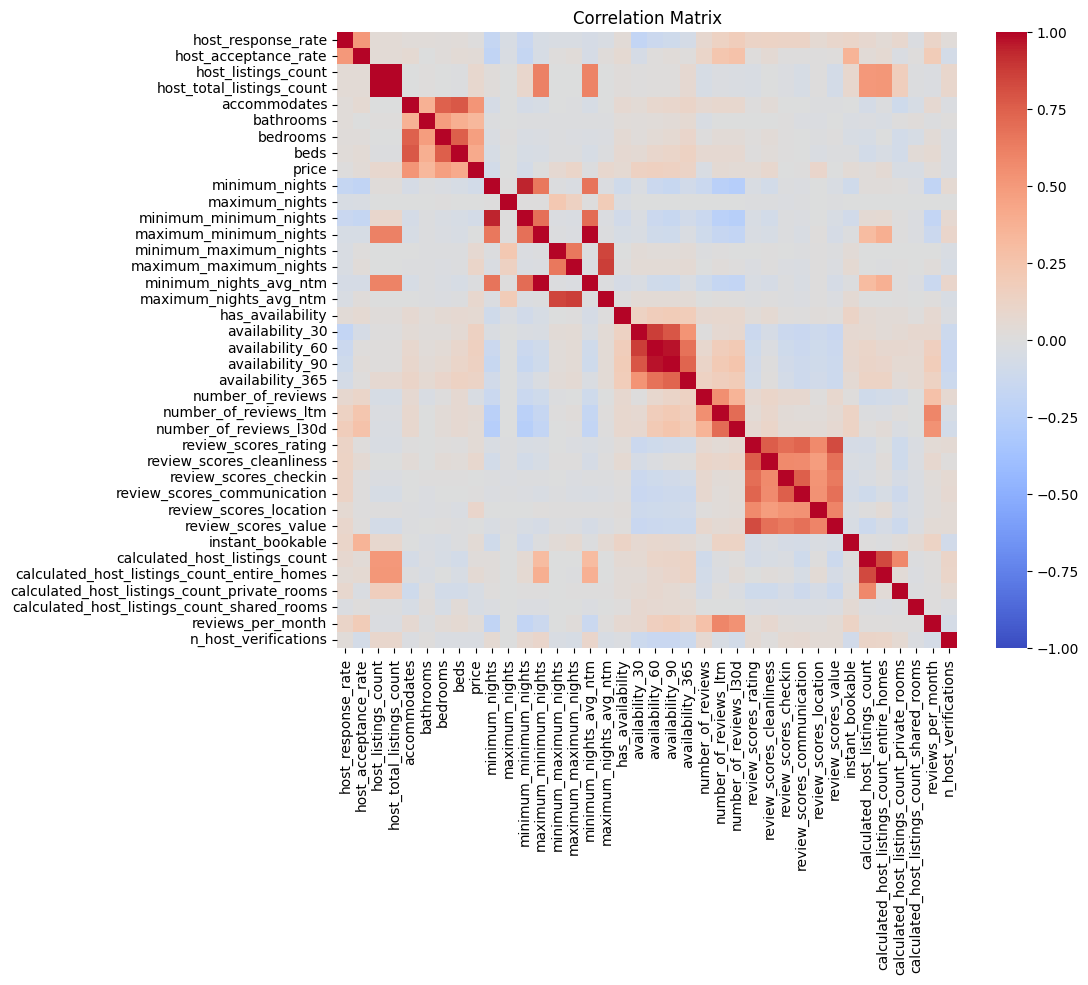

In [23]:
#visualize the correlation matrix with a heat map
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

1. Yes I have a new feature list. I will remove host_name, bedrooms, name, description, and host_location in addition to the ones I listed in part 2. 
2. To prepare the data for modeling, I will remove numerical features with more than 10% missing values and non-categorical string features (more than 5 unique values). For the remaining features with missing values, the numerical ones will be imputed with the mean. Features that are redundant will also be removed. A feature is redundant if it is strongly correlated with another feature. Then, I will ensure all features are numerical by using one-hot encoding for categorical features and doing feature engineering. One example of feature engineering is changing the amenities feature from a list to the number of amenities listed. To deal with outliers, I will perform winsorization on the features so that values less than and greather than a threshold percentile are replaced with the closest threshold percentile. Then, all the features will be normalized using z-score normalization so that the values are normally distributed. Standardizing the data will be necessary for certain machine learning models, so doing so will enable more model choices.
3. I will start with linear regression and move onto more advanced models if needed (decision trees, random forest, neural network).
4. My plan for model training, evaluation, and improving:
   - split data into training and testing sets
   - initialize the model with hyperparameters and fit the training set
   - predict the label for the test set
   - evaluate the performance using root mean squared error and r2
   - try the decision tree model if the linreg model has a low r2 score and high error
   - tune the hyperparameters using GridSearch to improve the performance for the test set
   - train a random forest model if the decision tree performs better than linreg
   - train a neural network model to see if performance can be further improved
 

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [24]:
label = 'price'

In [25]:
#remove columns relating to reviews
irrelevant_cols = [col for col in df.columns if 'review' in col]
irrelevant_cols

['number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'review_scores_rating',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month']

In [26]:
df = df.drop(columns=irrelevant_cols)
df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,availability_30,availability_60,availability_90,availability_365,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,3,33,63,338,False,3,3,0,0,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,3,6,18,194,False,1,1,0,0,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,3,3,12,123,False,1,1,0,0,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,1,16,34,192,False,1,0,1,0,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,0,0,0,0,False,1,0,1,0,7


In [27]:
#remove cols with number of NA >= 10% of examples
threshold = len(df) * 0.10

# identify columns with missing values count >= threshold
cols_to_drop = df.columns[df.isnull().sum() >= threshold]

df = df.drop(columns=cols_to_drop)

In [28]:
#identify non numeric cols with NA
non_num = df.select_dtypes(exclude=['number'])
non_num_na = np.sum(non_num.isnull(), axis=0) > 0
non_num_to_drop = non_num_na[non_num_na].index
non_num_to_drop

Index(['name', 'description', 'host_location'], dtype='object')

In [29]:
#drop non numeric cols with NA
df.drop(columns=non_num_to_drop, inplace=True)

In [30]:
#check for cols still containing NA
np.sum(df.isnull(), axis=0)

host_name                                          0
host_is_superhost                                  0
host_listings_count                                0
host_total_listings_count                          0
host_has_profile_pic                               0
host_identity_verified                             0
neighbourhood_group_cleansed                       0
room_type                                          0
accommodates                                       0
bathrooms                                          0
beds                                            1354
amenities                                          0
price                                              0
minimum_nights                                     0
maximum_nights                                     0
minimum_minimum_nights                             0
maximum_minimum_nights                             0
minimum_maximum_nights                             0
maximum_maximum_nights                        

In [31]:
#examine the values in the remaining column that has NA
na_col = df['beds']
beds_vals = na_col.unique()
print(beds_vals)
print(na_col.describe())
print(na_col.value_counts())

[ 1.  3.  2. nan  4.  6.  5. 10.  8. 18.  9.  7. 16. 12. 11. 21. 13.]
count    26668.000000
mean         1.629556
std          1.097104
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         21.000000
Name: beds, dtype: float64
1.0     16726
2.0      6082
3.0      2241
4.0       950
5.0       350
6.0       164
7.0        74
8.0        32
9.0        18
12.0       11
10.0        9
11.0        5
16.0        2
13.0        2
18.0        1
21.0        1
Name: beds, dtype: int64


In [32]:
#impute with median
df['beds'].fillna(df['beds'].median(), inplace=True)

In [33]:
# drop redundant columns relating to min/max nights
min_nights = df.columns[df.columns.str.contains('minimum_nights')]
min_nights = min_nights.drop('minimum_nights_avg_ntm')
min_nights

Index(['minimum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights'], dtype='object')

In [34]:
max_nights = df.columns[df.columns.str.contains('maximum_nights')]
max_nights = max_nights.drop('maximum_nights_avg_ntm')
max_nights

Index(['maximum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights'], dtype='object')

In [35]:
df = df.drop(columns=min_nights)
df = df.drop(columns=max_nights)
df

,host_name,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,room_type,accommodates,bathrooms,...,availability_30,availability_60,availability_90,availability_365,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,n_host_verifications
0,Jennifer,True,8.0,8.0,True,True,Manhattan,Entire home/apt,1,1.0,...,3,33,63,338,False,3,3,0,0,9
1,LisaRoxanne,True,1.0,1.0,True,True,Brooklyn,Entire home/apt,3,1.0,...,3,6,18,194,False,1,1,0,0,6
2,Rebecca,True,1.0,1.0,True,True,Brooklyn,Entire home/apt,4,1.5,...,3,3,12,123,False,1,1,0,0,3
3,Shunichi,True,1.0,1.0,True,True,Manhattan,Private room,2,1.0,...,1,16,34,192,False,1,0,1,0,4
4,MaryEllen,True,1.0,1.0,True,True,Manhattan,Private room,1,1.0,...,0,0,0,0,False,1,0,1,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28017,Vicky,True,8.0,8.0,True,True,Queens,Private room,2,1.0,...,17,47,77,352,True,8,0,8,0,2
28018,Samuel,True,0.0,0.0,True,True,Brooklyn,Entire home/apt,6,1.0,...,26,56,86,361,False,1,1,0,0,5
28019,Carlos,True,6.0,6.0,True,True,Brooklyn,Private room,2,2.0,...,29,59,89,364,True,7,0,7,0,2
28020,Lexia,True,3.0,3.0,True,True,Brooklyn,Entire home/apt,3,1.0,...,11,41,68,68,False,3,3,0,0,7


In [36]:
#prepare corr matrix to find other features with high corr between each other and remove redundant ones
corr = df.corr()
corr = corr.drop(columns=label, index=label)
corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
corr

,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,beds,minimum_nights_avg_ntm,maximum_nights_avg_ntm,...,availability_30,availability_60,availability_90,availability_365,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,n_host_verifications
host_is_superhost,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_listings_count,NaN,NaN,1.0,NaN,NaN,-0.003904,0.013256,-0.014932,0.606229,-0.002024,...,0.005963,0.010795,0.015562,0.069196,0.085573,0.507185,0.508865,0.169661,-0.008245,0.091531
host_total_listings_count,NaN,NaN,NaN,NaN,NaN,-0.003904,0.013256,-0.014932,0.606229,-0.002024,...,0.005963,0.010795,0.015562,0.069196,0.085573,0.507185,0.508865,0.169661,-0.008245,0.091531
host_has_profile_pic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_identity_verified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,NaN,NaN,NaN,NaN,NaN,NaN,0.369444,0.754248,-0.050014,-0.007449,...,0.044147,0.078921,0.089113,0.115102,-0.005734,-0.066611,-0.009926,-0.102831,-0.048569,-0.016719
bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.375696,-0.009039,-0.010077,...,0.019094,0.026169,0.033587,0.061379,-0.030011,-0.022528,-0.031999,0.006835,0.017551,0.012352
beds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.043932,-0.009820,...,0.039783,0.077610,0.091222,0.124058,-0.017042,-0.079410,-0.041423,-0.082117,0.030085,-0.021836
minimum_nights_avg_ntm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.015190,...,-0.033779,-0.097215,-0.107723,-0.029888,-0.012250,0.306639,0.378838,0.000292,-0.016177,0.098311
maximum_nights_avg_ntm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.045704,0.043966,0.040895,0.044375,0.050552,-0.002019,-0.007369,0.002236,-0.003887,-0.046195


In [37]:
#find pairs with correlation value greater than 0.8 -> redundant features
threshold = 0.8
high_corr_pairs = [(column, index) for column in corr.columns for index in corr.index if abs(corr.loc[index, column]) > threshold and column!=index]
print(high_corr_pairs)

[('host_total_listings_count', 'host_listings_count'), ('availability_60', 'availability_30'), ('availability_90', 'availability_60'), ('calculated_host_listings_count_entire_homes', 'calculated_host_listings_count')]


In [38]:
# List to hold columns to drop
to_drop = set()

# Iterate through pairs and add one column from each pair to the drop list
for pair in high_corr_pairs:
    col1, col2 = pair
    if col2 not in to_drop:
        to_drop.add(col2)
to_drop

{'availability_30',
 'availability_60',
 'calculated_host_listings_count',
 'host_listings_count'}

In [39]:
#drop redundant features
df = df.drop(columns=to_drop)
#drop host_name 
df = df.drop(columns='host_name')

In [40]:
#drop cols with only one unique val
non_num = df.select_dtypes(exclude=['number'])
to_drop = [col for col in non_num.columns if len(df[col].unique()) == 1]
df = df.drop(columns=to_drop)
non_num = non_num.drop(columns=to_drop)

In [41]:
df.head()

,host_total_listings_count,neighbourhood_group_cleansed,room_type,accommodates,bathrooms,beds,amenities,price,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_90,availability_365,instant_bookable,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,n_host_verifications
0,8.0,Manhattan,Entire home/apt,1,1.0,1.0,"[""Extra pillows and blankets"", ""Baking sheet"",...",150.0,30.0,1125.0,True,63,338,False,3,0,0,9
1,1.0,Brooklyn,Entire home/apt,3,1.0,3.0,"[""Extra pillows and blankets"", ""Luggage dropof...",75.0,1.0,730.0,True,18,194,False,1,0,0,6
2,1.0,Brooklyn,Entire home/apt,4,1.5,2.0,"[""Kitchen"", ""BBQ grill"", ""Cable TV"", ""Carbon m...",275.0,5.0,1125.0,True,12,123,False,1,0,0,3
3,1.0,Manhattan,Private room,2,1.0,1.0,"[""Room-darkening shades"", ""Lock on bedroom doo...",68.0,2.0,14.0,True,34,192,False,0,1,0,4
4,1.0,Manhattan,Private room,1,1.0,1.0,"[""Breakfast"", ""Carbon monoxide alarm"", ""Fire e...",75.0,2.0,14.0,True,0,0,False,0,1,0,7


In [42]:
#use one hot encoding for cols with less than 6 unique values

#identify the categorical columns
categorical = [col for col in non_num.columns if len(df[col].unique()) <= 5]
categorical

['neighbourhood_group_cleansed',
 'room_type',
 'has_availability',
 'instant_bookable']

In [43]:
#change categorical features to numerical features using one hot encoding
df = pd.get_dummies(df, columns=categorical)
df.columns

Index(['host_total_listings_count', 'accommodates', 'bathrooms', 'beds',
       'amenities', 'price', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'availability_90', 'availability_365',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'n_host_verifications',
       'neighbourhood_group_cleansed_Bronx',
       'neighbourhood_group_cleansed_Brooklyn',
       'neighbourhood_group_cleansed_Manhattan',
       'neighbourhood_group_cleansed_Queens',
       'neighbourhood_group_cleansed_Staten Island',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room',
       'has_availability_False', 'has_availability_True',
       'instant_bookable_False', 'instant_bookable_True'],
      dtype='object')

In [44]:
# change amenities to a numerical feature by counting the number of items in amenities list
def count_amenities(amenities):
    return amenities.count(',') + 1

df['amenities'] = df['amenities'].apply(count_amenities)

In [45]:
df.describe()

,host_total_listings_count,accommodates,bathrooms,beds,amenities,price,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_90,availability_365,...,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,has_availability_False,has_availability_True,instant_bookable_False,instant_bookable_True
count,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,2.802200e+04,28022.000000,28022.000000,...,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000
mean,14.554778,2.874491,1.142174,1.599136,24.279780,154.228749,20.042431,2.419200e+06,33.492078,130.198808,...,0.142852,0.010135,0.556848,0.004889,0.424702,0.013561,0.037221,0.962779,0.727357,0.272643
std,120.721287,1.860251,0.421132,1.078750,11.519675,140.816605,39.033701,6.790497e+07,33.786449,139.030742,...,0.349928,0.100163,0.496767,0.069752,0.494307,0.115661,0.189306,0.189306,0.445327,0.445327
min,0.000000,1.000000,0.000000,1.000000,1.000000,29.000000,1.000000,1.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,1.000000,1.000000,15.000000,70.000000,2.000000,3.000000e+02,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1.000000,2.000000,1.000000,1.000000,23.000000,115.000000,30.000000,1.125000e+03,27.000000,71.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,3.000000,4.000000,1.000000,2.000000,31.000000,180.000000,30.000000,1.125000e+03,65.000000,279.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,3387.000000,16.000000,8.000000,21.000000,91.000000,1000.000000,1250.000000,2.147484e+09,90.000000,365.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
df.shape

(28022, 27)

In [47]:
#winsorize every column
for col in df.columns:
    df[col] = stats.mstats.winsorize(df[col], limits=[0.01, 0.01])

In [48]:
from sklearn.preprocessing import StandardScaler

#normalize features
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [49]:
df.describe()

,host_total_listings_count,accommodates,bathrooms,beds,amenities,price,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_90,availability_365,...,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,has_availability_False,has_availability_True,instant_bookable_False,instant_bookable_True
count,2.802200e+04,2.802200e+04,2.802200e+04,2.802200e+04,2.802200e+04,2.802200e+04,28022.000000,2.802200e+04,2.802200e+04,2.802200e+04,...,2.802200e+04,2.802200e+04,2.802200e+04,28022.0,2.802200e+04,2.802200e+04,2.802200e+04,2.802200e+04,2.802200e+04,2.802200e+04
mean,8.114113e-18,-9.736936e-17,2.383521e-16,-4.817755e-17,1.460540e-16,7.302702e-17,0.000000,-6.896996e-17,-1.135976e-16,-8.114113e-18,...,3.245645e-17,-4.057057e-18,2.231381e-17,0.0,-1.724249e-17,-5.122034e-17,2.839940e-17,-1.744534e-16,3.245645e-17,8.925524e-17
std,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018,1.000018e+00,1.000018e+00,1.000018e+00,...,1.000018e+00,1.000018e+00,1.000018e+00,0.0,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00
min,-3.094920e-01,-1.072559e+00,-3.752377e-01,-5.904388e-01,-1.614422e+00,-9.085508e-01,-1.069879,-1.679744e+00,-9.913050e-01,-9.364917e-01,...,-4.082398e-01,-1.011863e-01,-1.120965e+00,0.0,-8.592029e-01,-1.172484e-01,-1.966207e-01,-5.085935e+00,-1.633340e+00,-6.122422e-01
25%,-2.735183e-01,-4.923421e-01,-3.752377e-01,-5.904388e-01,-8.179189e-01,-6.139512e-01,-1.007095,-1.061004e+00,-9.913050e-01,-9.364917e-01,...,-4.082398e-01,-1.011863e-01,-1.120965e+00,0.0,-8.592029e-01,-1.172484e-01,-1.966207e-01,1.966207e-01,-1.633340e+00,-6.122422e-01
50%,-2.735183e-01,-4.923421e-01,-3.752377e-01,-5.904388e-01,-1.099164e-01,-2.825268e-01,0.750873,6.811814e-01,-1.921538e-01,-4.258041e-01,...,-4.082398e-01,-1.011863e-01,8.920883e-01,0.0,-8.592029e-01,-1.172484e-01,-1.966207e-01,1.966207e-01,6.122422e-01,-6.122422e-01
75%,-2.015708e-01,6.680927e-01,-3.752377e-01,4.178662e-01,5.980861e-01,1.961975e-01,0.750873,6.811814e-01,9.325776e-01,1.070295e+00,...,-4.082398e-01,-1.011863e-01,8.920883e-01,0.0,1.163869e+00,-1.172484e-01,-1.966207e-01,1.966207e-01,6.122422e-01,1.633340e+00
max,6.057860e+00,4.149397e+00,4.938007e+00,4.451086e+00,2.810594e+00,5.491624e+00,4.517945,6.811814e-01,1.672532e+00,1.688874e+00,...,2.449541e+00,9.882763e+00,8.920883e-01,0.0,1.163869e+00,8.528898e+00,5.085935e+00,1.966207e-01,6.122422e-01,1.633340e+00


### Finished cleaning and preparing the dataset! Moving on to model training ...

In [50]:
# create labeled X and y datasets
y = df[label]
X = df.drop(columns=label)
X.shape

(28022, 26)

In [51]:
from sklearn.model_selection import train_test_split

# create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
X_train.shape

(19615, 26)

In [52]:
y_train.shape

(19615,)

In [53]:
#function for plotting the error between y_pred and y_test
def predictions_error(y_pred):
    error = y_pred - y_test
    plt.hist(error, bins=25)
    plt.xlabel('Prediction Error')
    _ = plt.ylabel('Count')

Mean Squared Error (MSE): 0.5872143168935102
R-squared (R²): 0.41306437553796216


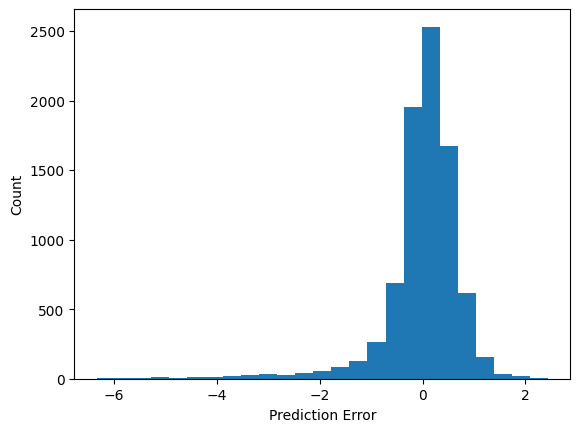

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model_mse  = {}

#create lingreg model, fit, predict, evaluate
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
predictions = lr_model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)
predictions_error(predictions)

#add model mse to a dictionary for easier comparison with other models
model_mse['linear regression'] = mse

### Results are poor, so I will now try decision trees.

In [55]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [56]:
#use grid search to find optimal hyperparameters for the decision tree
grid_search = GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [5, 10, 15], 'min_samples_leaf': [.01, .001, .0001]}, cv=10, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

#Get the best estimator
best_dt = grid_search.best_estimator_
best_dt

Fitting 10 folds for each of 9 candidates, totalling 90 fits


DecisionTreeRegressor(max_depth=10, min_samples_leaf=0.001)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 0.001}
Mean Squared Error (MSE): 0.515570801860031
R-squared (R²): 0.4846738884961691


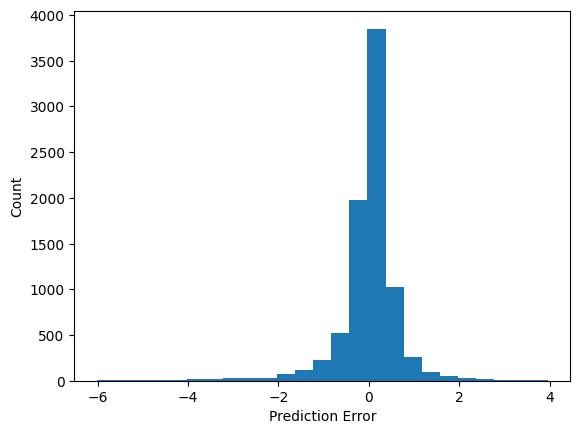

In [57]:
y_pred = best_dt.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)
predictions_error(y_pred)

model_mse['decision tree'] = mse

### Improvement in performance! MSE is lower and R^2 is higher. I will move onto a random forest model since ensemble models usually yield better results and random forests are composed of decision trees.

Mean Squared Error (MSE): 0.4000027141228478
R-squared (R²): 0.6001871275172269


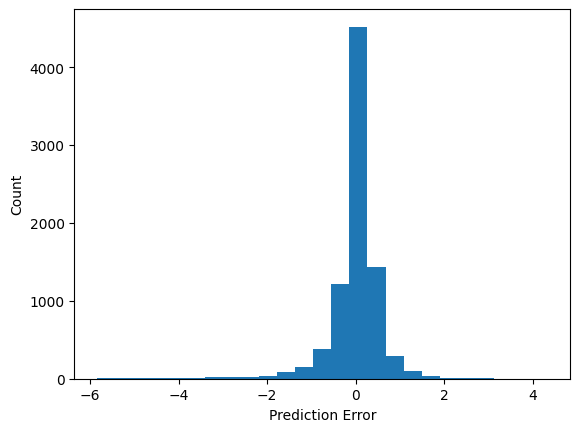

In [58]:
from sklearn.ensemble import RandomForestRegressor

#hyperparameter values based on previous runs of gridsearchcv
rf_model = RandomForestRegressor(n_estimators=700, min_samples_split=2, min_samples_leaf=1,
 max_features=0.333, max_depth=15, bootstrap=False)
rf_model.fit(X_train, y_train)
pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)
predictions_error(pred)

model_mse['random forest'] = mse

## Note: The cell below takes ~ 6 minutes to run.

In [59]:
#find optimal n_estimators and max_depth parameters
n_estimators = np.arange(100,800, 100)
max_features = [0.333]
max_depth = [10, 12, 15]
min_samples_split = [2]
min_samples_leaf = [1]
bootstrap = [False]

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
grid_search = GridSearchCV(estimator=RandomForestRegressor(bootstrap=True),
             param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

print('grid search done')

# Get the best estimator
best_rf = grid_search.best_estimator_
best_rf

Fitting 3 folds for each of 21 candidates, totalling 63 fits
grid search done


RandomForestRegressor(bootstrap=False, max_depth=15, max_features=0.333,
                      n_estimators=700)

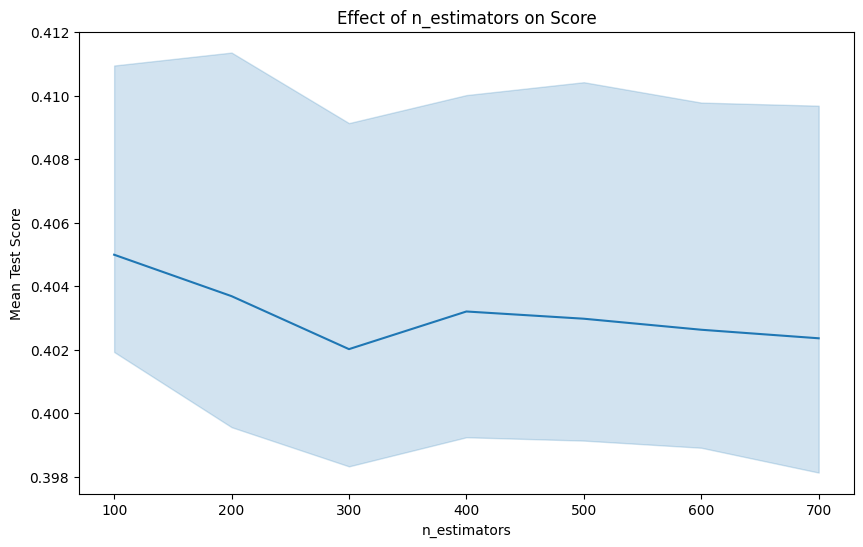

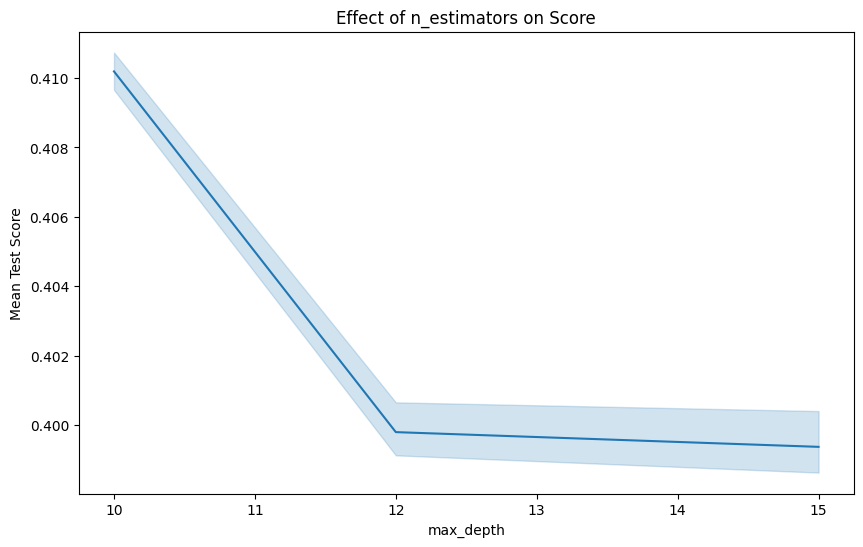

In [60]:
#get results of grid search cv to visualize the effect of different parameter values on the score
results = pd.DataFrame(grid_search.cv_results_)
results['mean_test_score'] = -results['mean_test_score']

# Line Plot of n_estimators vs mean_test_score
plt.figure(figsize=(10, 6))
sns.lineplot(data=results, x='param_n_estimators', y='mean_test_score')
plt.title('Effect of n_estimators on Score')
plt.xlabel('n_estimators')
plt.ylabel('Mean Test Score')
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(data=results, x='param_max_depth', y='mean_test_score')
plt.title('Effect of n_estimators on Score')
plt.xlabel('max_depth')
plt.ylabel('Mean Test Score')
plt.show()

Best Parameters: {'bootstrap': False, 'max_depth': 15, 'max_features': 0.333, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 700}
Mean Squared Error (MSE): 0.3992374276780341
R-squared (R²): 0.6009520507564206


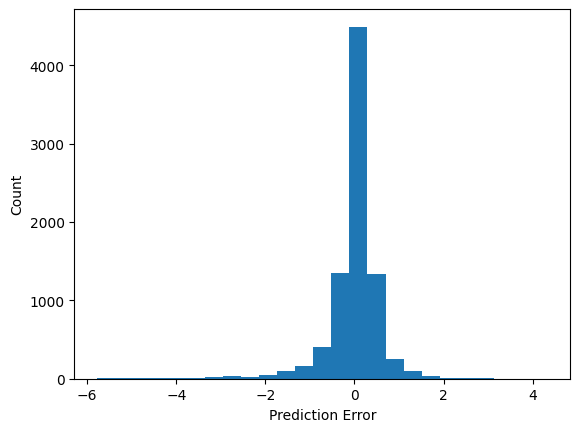

In [61]:
y_pred = best_rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)
predictions_error(y_pred)

model_mse['updated random forest'] = mse

In [62]:
#examine the top features for predicting the label
feature_imp = best_rf.feature_importances_
df_features = pd.DataFrame({'name': X_train.columns.values, 'imp': feature_imp})

# sort df_features in descending order 
df_sorted = df_features.sort_values(by='imp', ascending = False)

#top 5 sorted feature names
df_sorted[:5]

,name,imp
1,accommodates,0.160890
2,bathrooms,0.125751
7,availability_90,0.069778
15,neighbourhood_group_cleansed_Manhattan,0.066879
5,minimum_nights_avg_ntm,0.062974


### The best random forest model is able to predict the label with an R^2 score of ~ 0.6, which is a big improvement from the linear regression model (~ 0.41) and the decision tree (~ 0.49).

In [63]:
#try neural networks and see if a better model can be made
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

2024-08-01 03:40:32.283496: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-08-01 03:40:32.283529: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [64]:
#create and compile the neural network
nn_model = tf.keras.Sequential([
    keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(1)
  ])
nn_model.compile(loss='mean_squared_error',
     optimizer=keras.optimizers.SGD(learning_rate=0.01), metrics=['mean_squared_error'])

nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1728      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 4,481
Trainable params: 4,481
Non-trainable params: 0
_________________________________________________________________


2024-08-01 03:40:35.890932: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-08-01 03:40:35.890957: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2024-08-01 03:40:35.891017: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (i-036abd83808f66022): /proc/driver/nvidia/version does not exist
2024-08-01 03:40:35.891247: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [65]:
#function to plot the training and validation loss
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()

2024-08-01 03:40:36.043158: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2024-08-01 03:40:36.049645: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2649995000 Hz


Epoch 1/30
491/491 [==============================] - 1s 871us/step - loss: 0.5889 - mean_squared_error: 0.5889 - val_loss: 0.5089 - val_mean_squared_error: 0.5089
Epoch 2/30
491/491 [==============================] - 0s 665us/step - loss: 0.4880 - mean_squared_error: 0.4880 - val_loss: 0.5016 - val_mean_squared_error: 0.5016
Epoch 3/30
491/491 [==============================] - 0s 657us/step - loss: 0.4705 - mean_squared_error: 0.4705 - val_loss: 0.4800 - val_mean_squared_error: 0.4800
Epoch 4/30
491/491 [==============================] - 0s 653us/step - loss: 0.4559 - mean_squared_error: 0.4559 - val_loss: 0.4632 - val_mean_squared_error: 0.4632
Epoch 5/30
491/491 [==============================] - 0s 659us/step - loss: 0.4496 - mean_squared_error: 0.4496 - val_loss: 0.4713 - val_mean_squared_error: 0.4713
Epoch 6/30
491/491 [==============================] - 0s 656us/step - loss: 0.4405 - mean_squared_error: 0.4405 - val_loss: 0.4574 - val_mean_squared_error: 0.4574
Epoch 7/30
491/4

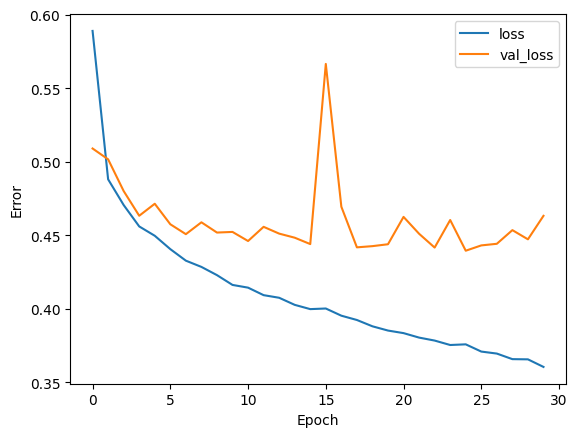

In [66]:
history = nn_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=1, epochs=30)
plot_loss(history)

In [67]:
mse = nn_model.evaluate(X_test, y_test)
model_mse['neural network'] = mse

263/263 [==============================] - 0s 440us/step - loss: 0.4641 - mean_squared_error: 0.4641


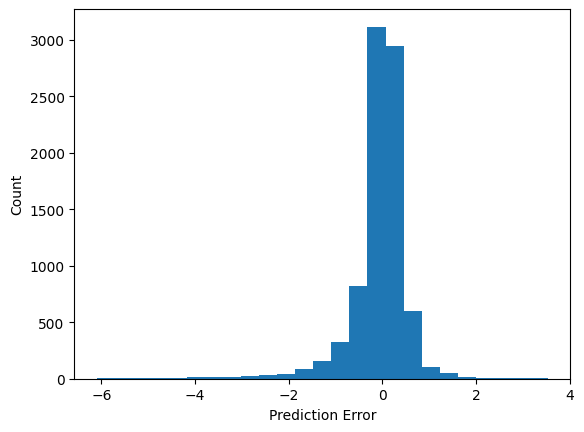

In [68]:
y_predictions = nn_model.predict(X_test).flatten()
error = y_predictions - y_test
plt.hist(error, bins=25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

In [69]:
print(model_mse)

{'linear regression': 0.5872143168935102, 'decision tree': 0.515570801860031, 'random forest': 0.4000027141228478, 'updated random forest': 0.3992374276780341, 'neural network': [0.46414220333099365, 0.46414220333099365]}


### After trying out different numbers of layers with different combinations of units, it appears that the neural network model stops decreasing at MSE of ~ 0.46. In comparison the random forest model has a MSE of ~ 0.40. Thus, the final model to use will be the random forest model.

### Based on the histogram plot of error on the test set, the model predicts the label closely most of the time. Computing the root of MSE indicates that the random forest model generally is off by about 0.63 standard deviations. Since there is a range of error, this model should be used to generate a price range rather than a single price for an example.